In [ ]:
#%pip install --upgrade --no-deps --force-reinstall https://github.com/sagasurvey/saga/archive/master.zip

In [1]:
import initializing_saga
from initializing_saga import np, plt, pd
from initializing_saga import completed_hosts, completed_hosts_sorted, sats_completed_hosts_sorted
from LMC_MG import hosts_with_LMCs, magnitude_gap_hs, magnitude_gap_sat

SAGA `shared_dir` set to /Users/Veronica/Documents/GitHub/examples
SAGA `local_dir`  set to /Users/Veronica/Documents/GitHub/examples
SAGA `shared_dir` set to /Users/Veronica/Documents/GitHub/examples
SAGA `local_dir`  set to /Users/Veronica/Documents/GitHub/examples


### Morphology X LMCs For Paper 2

In [2]:
import scipy

In [3]:
from simulation_data_scatter import chance_of_LMC_01, chance_of_LMC_015, chance_of_LMC_02
from simulation_data_scatter import rand_arr_pred_01_mag_gap, rand_arr_pred_015_mag_gap, rand_arr_pred_02_mag_gap
from simulation_data_scatter import mean_mag_gap_01, mean_mag_gap_02, std_mag_gap_01, std_mag_gap_02

ModuleNotFoundError: No module named 'simulation_data_scatter'

In [4]:
from Paper_2_Morphology import df_morph_prop_condensed

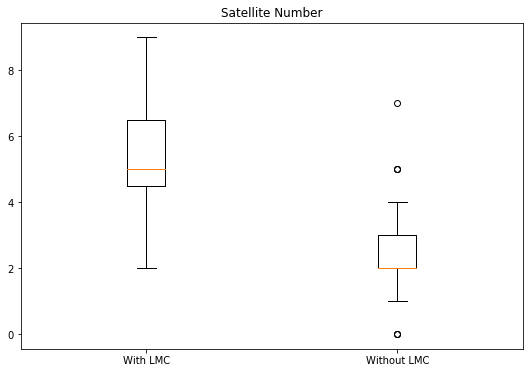

In [5]:
hosts_LMC_array_sat_num = []
hosts_no_LMC_array_sat_num = []
for key in hosts_with_LMCs.keys():
    x = list(hosts_with_LMCs.keys()).index(key)
    if hosts_with_LMCs[key] == True:
        hosts_LMC_array_sat_num.append([completed_hosts['sats_Mr_limit'][x]])
    else: 
        hosts_no_LMC_array_sat_num.append([completed_hosts['sats_Mr_limit'][x]])
        
data_to_plot = [hosts_LMC_array_sat_num, hosts_no_LMC_array_sat_num]
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
#labelling axes
ax.set_xticklabels(['With LMC', 'Without LMC'])
ax.set_title('Satellite Number')
bp = ax.boxplot(data_to_plot)

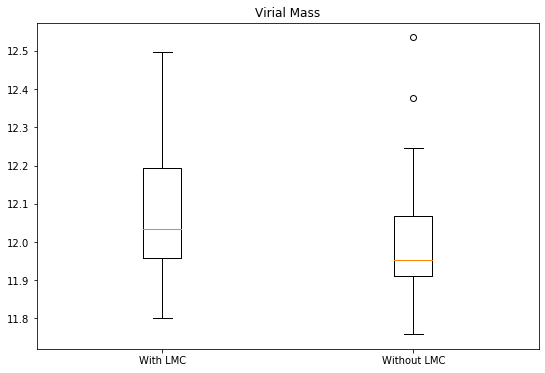

In [6]:
hosts_LMC_array_mass = []
hosts_no_LMC_array_mass = []
for key in hosts_with_LMCs.keys():
    x = list(hosts_with_LMCs.keys()).index(key)
    if hosts_with_LMCs[key] == True:
        hosts_LMC_array_mass.append([completed_hosts['M_HALO'][x]])
    else: 
        hosts_no_LMC_array_mass.append([completed_hosts['M_HALO'][x]])
        
data_to_plot = [hosts_LMC_array_mass, hosts_no_LMC_array_mass]
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
#labelling axes
ax.set_xticklabels(['With LMC', 'Without LMC'])
ax.set_title('Virial Mass')
bp = ax.boxplot(data_to_plot)

### Comparing SAGA Hosts With and Without LMCs

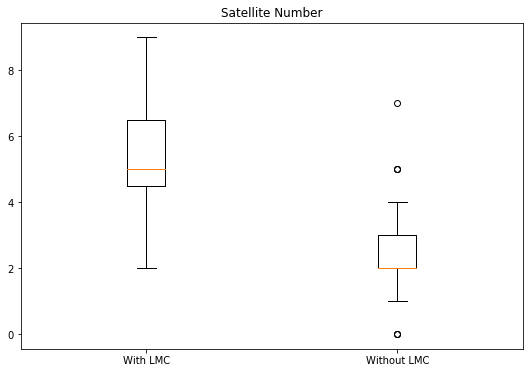

In [7]:
data_to_plot = [hosts_LMC_array_sat_num, hosts_no_LMC_array_sat_num]
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
#labelling axes
ax.set_xticklabels(['With LMC', 'Without LMC'])
ax.set_title('Satellite Number')
bp = ax.boxplot(data_to_plot)

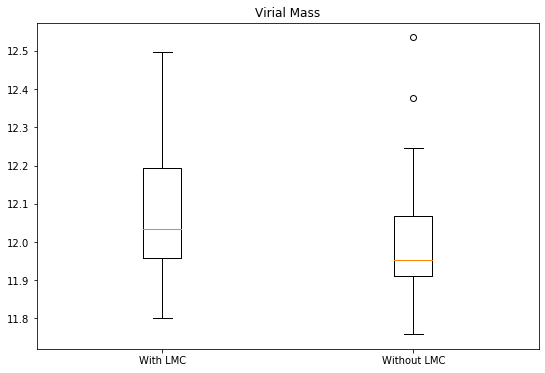

In [8]:
data_to_plot = [hosts_LMC_array_mass, hosts_no_LMC_array_mass]
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
#labelling axes
ax.set_xticklabels(['With LMC', 'Without LMC'])
ax.set_title('Virial Mass')
bp = ax.boxplot(data_to_plot)

### Morphology X LMCs For Paper 2

In [9]:
#converting completed_hosts to dataframe!
df_completed_hosts = completed_hosts.to_pandas()
#creating 2 separate dataframes for with or without LMC
df_with_LMC = df_completed_hosts
df_without_LMC = df_completed_hosts
index = -1
for key in hosts_with_LMCs:
    index = index+1
    if hosts_with_LMCs[key] == True: 
        df_without_LMC = df_without_LMC.drop([index])
    if hosts_with_LMCs[key] == False:
        df_with_LMC = df_with_LMC.drop([index])

In [10]:
LMC_SAB = df_with_LMC
LMC_ES0 = df_with_LMC
for host in df_with_LMC['HOSTID']:
    index = df_with_LMC[df_with_LMC['HOSTID'] == host].index.values
    if df_morph_prop_condensed[host] == 'E/S0':
        LMC_SAB = LMC_SAB.drop(index)
    if df_morph_prop_condensed[host] == 'SAB':
        LMC_ES0 = LMC_ES0.drop(index)
        
no_LMC_SAB = df_without_LMC
no_LMC_ES0 = df_without_LMC
for host in df_without_LMC['HOSTID']:
    index = df_without_LMC[df_without_LMC['HOSTID'] == host].index.values
    if df_morph_prop_condensed[host] == 'E/S0':
        no_LMC_SAB = no_LMC_SAB.drop(index)
    if df_morph_prop_condensed[host] == 'SAB':
        no_LMC_ES0 = no_LMC_ES0.drop(index)

In [11]:
mw_m31_list = {'sat_num': [5, 9], 'K_ABS': [-24.0, -24.7], 'Virial Mass': [12.2, 12.54]}
mw_m31 = pd.DataFrame(mw_m31_list, columns = ['sat_num', 'K_ABS', 'Virial Mass'], index = ['Milky Way', 'M31'])

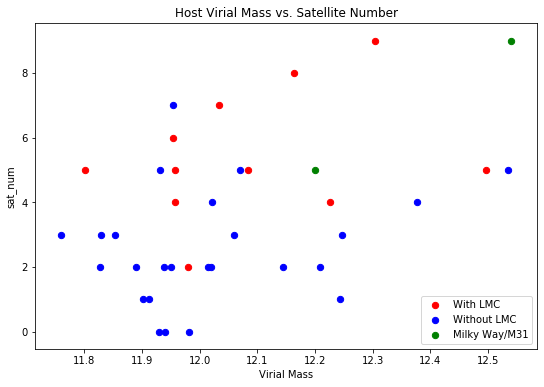

LMC: SpearmanrResult(correlation=0.2243603128386563, pvalue=0.5071813597039245)
No LMC: SpearmanrResult(correlation=0.23142074764371595, pvalue=0.2656832793995425)


In [12]:
#LMC analog vs. host magnitude x HALO mass
plt.figure(figsize=(9, 6))
ax = plt.gca()
df_with_LMC.plot(kind='scatter',x='M_HALO',y='sats_Mr_limit',color='red', ax = ax, s = 40, label = 'With LMC')
df_without_LMC.plot(kind='scatter',x='M_HALO',y='sats_Mr_limit',color='blue', ax=ax, s = 40, label = 'Without LMC')
mw_m31.plot(kind='scatter',x='Virial Mass',y='sat_num',color='green', ax=ax, s = 40, label = 'Milky Way/M31')
plt.legend(loc = 'lower right')
plt.title('Host Virial Mass vs. Satellite Number')
plt.show()
print('LMC: ' + str(scipy.stats.spearmanr(df_with_LMC['M_HALO'],df_with_LMC['sats_Mr_limit'])))
print('No LMC: ' + str(scipy.stats.spearmanr(df_without_LMC['M_HALO'],df_without_LMC['sats_Mr_limit'])))

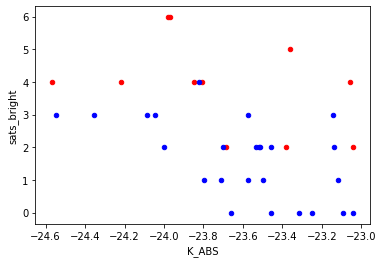

In [13]:
#Central luminsoity vs. number of bright satellites
ax = plt.gca()
df_with_LMC.plot(kind='scatter',x='K_ABS',y='sats_bright',color='red', ax = ax)
df_without_LMC.plot(kind='scatter',x='K_ABS',y='sats_bright',color='blue', ax=ax)
plt.show()

#print(scipy.stats.spearmanr(completed_hosts['K_ABS'],completed_hosts['sats_bright']))
#print(scipy.stats.pearsonr(completed_hosts['K_ABS'],completed_hosts['sats_bright']))

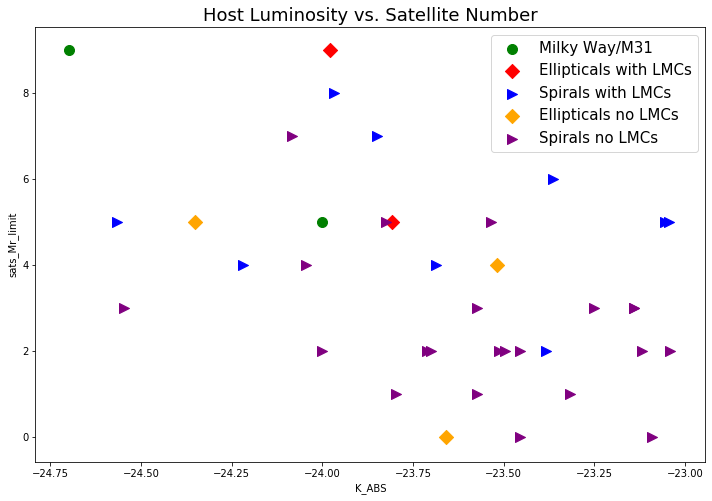

In [14]:
fig, ax = plt.subplots(figsize=(12, 8)) 
mw_m31.plot(kind='scatter',x='K_ABS',y='sat_num', s = 100, color='green', ax=ax, label = 'Milky Way/M31')
LMC_ES0.plot(kind='scatter',x='K_ABS',y='sats_Mr_limit', s = 100, color='red', marker = 'D', ax = ax, label = 'Ellipticals with LMCs')
LMC_SAB.plot(kind='scatter',x='K_ABS',y='sats_Mr_limit', s = 100, color='blue', marker = '>', ax = ax, label = 'Spirals with LMCs')
no_LMC_ES0.plot(kind='scatter',x='K_ABS',y='sats_Mr_limit', s = 100, color='orange', marker = 'D', ax = ax, label = 'Ellipticals no LMCs')
no_LMC_SAB.plot(kind='scatter',x='K_ABS',y='sats_Mr_limit', s = 100, color='purple', marker = '>', ax = ax, label = 'Spirals no LMCs')
plt.rcParams['font.size'] = 15
#plt.figure(figsize=(20, 25))
plt.legend(loc = 'upper right')
plt.title('Host Luminosity vs. Satellite Number')
plt.show()

### Simulation Data

In [ ]:
plt.hist(chance_of_LMC_01.values(), histtype = 'step', color = 'b', label = '0.1 Dex')
plt.hist(chance_of_LMC_015.values(), color = 'red', histtype = 'step', label = '0.15 Dex')
plt.hist(chance_of_LMC_02.values(), color = 'g', histtype = 'step', label = '0.2 Dex')
plt.title('Predicted Chances of LMCs 0.1Dex vs. 0.15Dex vs. 0.2Dex')
plt.legend(loc = 'upper right')

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(rand_arr_pred_01_mag_gap, histtype = 'step', normed = True, label = 'Prediction 0.1')
plt.hist(rand_arr_pred_015_mag_gap, histtype = 'step', normed = True, label = 'Prediction 0.15')
plt.hist(rand_arr_pred_02_mag_gap, histtype = 'step', normed = True, label = 'Prediction 0.2')

plt.hist(magnitude_gap_hs.values(), histtype = 'step', normed = True, color = 'red', label = 'SAGA')

plt.legend(loc = 'upper left' )
plt.title("Randomized Predicted Magnitude Gap vs. SAGA's")
plt.xlabel('Predicted Magnitude Gap')
plt.ylabel('Fraction of All Gaps')

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(magnitude_gap_hs.values(), completed_hosts['K_ABS'], s = 50, c = 'blue', label = 'SAGA')
ax.errorbar(mean_mag_gap_01.values(), completed_hosts['K_ABS'], xerr=std_mag_gap_01.values(), fmt='o', capsize = 50, c = 'g', label = '0.1 Mean')
ax.errorbar(mean_mag_gap_02.values(), completed_hosts['K_ABS'], xerr=std_mag_gap_02.values(), fmt='o', capsize = 50,  c = 'purple', label = '0.2 Mean')
plt.legend(loc = 'lower left')
plt.rcParams['font.size'] = 15
plt.title('Predicted Magnitude Gap vs. Host Luminosity')

In [ ]:
plt.hist(chance_LMC_139.values(), histtype = 'step', color = 'r', label = '-1.39')
plt.hist(chance_LMC_143.values(), histtype = 'step', color = 'g', label = '-1.43')
plt.hist(chance_LMC_146.values(), histtype = 'step', color = 'b', label = '-1.46')
plt.title('Predicted Chances of Host with LMC - Changing Alpha')
plt.legend(loc = 'upper right')
print('Mean Chance -1.39 = ' + str(np.mean(chance_LMC_139_arr)))
print('Mean Chance -1.43 = ' + str(np.mean(chance_LMC_143_arr)))
print('Mean Chance -1.46 = ' + str(np.mean(chance_LMC_146_arr)))